In [ ]:
!pip install tensorly
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=e0fa650afb96fb5d6722a45aebc64d6f5dcf61c408b7a379b587f71fb0584310
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from tensorly.decomposition import parafac
from tensorly.decomposition import non_negative_parafac

# Load your data
methylation_df = pd.read_excel('/content/drive/MyDrive/Methylation_ENCODER.xlsx')
rnaseq_df = pd.read_excel('/content/drive/MyDrive/RNAseq_ENCODER.xlsx')
mirna_df = pd.read_excel('/content/drive/MyDrive/miRNASeq_ENCODER.xlsx')
image_df = pd.read_excel('/content/drive/MyDrive/all_images_BRAC_128_filtered_unique.xlsx')




In [ ]:

first_column_name = methylation_df.columns[0]
print(first_column_name)


attrib_name


In [ ]:
pip install jive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.cluster import KMeans
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt



# standardize the data
scaler = StandardScaler()
methylation_scaled = scaler.fit_transform(methylation_df.drop('attrib_name', axis=1))
rnaseq_scaled = scaler.fit_transform(rnaseq_df.drop('attrib_name', axis=1))
mirna_scaled = scaler.fit_transform(mirna_df.drop('attrib_name', axis=1))
image_features_scaled = scaler.fit_transform(image_df.drop('attrib_name', axis=1))


# apply PCA
pca_methylation = PCA(n_components=2).fit_transform(methylation_scaled)
pca_rnaseq = PCA(n_components=2).fit_transform(rnaseq_scaled)
pca_mirna = PCA(n_components=2).fit_transform(mirna_scaled)
pca_image = PCA(n_components=2).fit_transform(image_features_scaled)

# combine the PCA results into one DataFrame
combined_pca_df = pd.DataFrame({
    'PCA_Methylation_1': pca_methylation[:, 0],
    'PCA_Methylation_2': pca_methylation[:, 1],
    'PCA_RNAseq_1': pca_rnaseq[:, 0],
    'PCA_RNAseq_2': pca_rnaseq[:, 1],
    'PCA_miRNA_1': pca_mirna[:, 0],
    'PCA_miRNA_2': pca_mirna[:, 1],
    'PCA_Image_1': pca_image[:, 0],
    'PCA_Image_2': pca_image[:, 1],
    'attrib_name': methylation_df['attrib_name']
})


combined_pca_df.set_index('attrib_name')




,PCA_Methylation_1,PCA_Methylation_2,PCA_RNAseq_1,PCA_RNAseq_2,PCA_miRNA_1,PCA_miRNA_2,PCA_Image_1,PCA_Image_2
attrib_name,,,,,,,,
TCGA.3C.AAAU,3.446048,4.272459,-0.178956,-0.165239,0.563878,3.992235,-2.346406,-0.324553
TCGA.3C.AALI,0.478404,-1.012436,3.742492,0.580291,-1.369345,2.356143,-4.041176,0.577359
TCGA.3C.AALJ,1.608912,-2.376556,3.469483,0.270856,-1.483560,1.259749,-5.170196,1.178751
TCGA.3C.AALK,1.422571,-3.409018,2.329040,-2.649046,-2.172137,-1.541297,7.999639,30.603347
TCGA.4H.AAAK,1.263058,0.637721,1.233449,-2.410959,-3.160735,-1.914966,-3.846752,0.538890
...,...,...,...,...,...,...,...,...
TCGA.WT.AB44,2.646601,-0.164245,3.896367,-0.955347,-2.519454,-1.891602,-4.534447,0.694600
TCGA.XX.A899,-2.060386,-2.864057,0.930915,-4.152120,-3.286600,-2.635163,6.934241,-3.943178
TCGA.XX.A89A,-3.188891,-0.664816,1.742467,-3.225889,-2.719908,-4.170298,-0.260475,-1.008112


In [ ]:
# 1. import clinical.xlsx
data_methylation = pd.read_excel('/content/drive/MyDrive/Methylation_ENCODER.xlsx')
data_clinical = pd.read_excel('/content/drive/MyDrive/Clinical.xlsx')
selected_samples = data_methylation.iloc[:, 0].unique()
data = data_clinical[data_clinical['attrib_name'].isin(selected_samples)]



# 1.  Delete columns in “overall_survival” and “status” that contains "NA"
data = data.dropna(subset=['overall_survival', 'status'])

# 2. Change "NA" in numerical attributes to 0
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(0)

# 3. Change "NA" in character attributes to "No value"
text_cols = data.select_dtypes(include=['object']).columns
data[text_cols] = data[text_cols].fillna('No value')




data = data.set_index('attrib_name')
data.index = data.index.astype(str)

# use index to merge data
merged_data = data.merge(combined_pca_df, left_index=True, right_on='attrib_name')
merged_data

,years_to_birth,Tumor_purity,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,PAM50,ER.Status,...,overallsurvival,PCA_Methylation_1,PCA_Methylation_2,PCA_RNAseq_1,PCA_RNAseq_2,PCA_miRNA_1,PCA_miRNA_2,PCA_Image_1,PCA_Image_2,attrib_name
548,73.0,0.1497,stagei,t1,n0,m0,infiltratingductalcarcinoma,0.0,No value,No value,...,"323,0",-4.246694,-3.661438,3.150799,-2.591679,0.461667,-7.134674,-1.608988,-0.735754,TCGA.LD.A9QF
469,60.0,0.2308,stageiii,t2,n3,m0,infiltratinglobularcarcinoma,10.0,No value,No value,...,"812,0",-2.372473,-4.447051,4.713057,-2.417650,-2.610244,-1.177162,0.564207,-1.678098,TCGA.E9.A5FK
32,66.0,0.2489,stageii,t2,n0,m0,infiltratingductalcarcinoma,0.0,Basal,No value,...,"322,0",-5.823399,-4.082292,-1.716561,0.599228,5.088609,-1.878711,1.191363,-1.869638,TCGA.A2.A25F
463,63.0,0.3275,stageii,t2,n0,m0,infiltratinglobularcarcinoma,0.0,LumA,No value,...,"288,0",-5.159245,-4.703500,0.347411,-2.756747,-2.899842,-1.417158,3.287098,-2.788399,TCGA.E9.A2JT
556,50.0,0.3351,stagei,t1,n0,No value,infiltratingductalcarcinoma,0.0,Her2,No value,...,"440,0",-5.273558,-3.893804,4.289187,0.055043,3.739935,-1.971987,-0.763959,-1.008332,TCGA.LL.A5YO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,49.0,0.0000,stageiii,t2,n3,No value,infiltratinglobularcarcinoma,19.0,No value,No value,...,"373,0",0.493075,-0.928979,0.153235,-3.000931,-2.825499,-3.199568,-5.660602,1.516326,TCGA.AC.A6IX
230,35.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,1.0,LumA,No value,...,"3462,1",5.793260,4.218053,-3.082890,1.707155,1.599342,1.068590,-2.423044,-0.104184,TCGA.BH.A1ES
244,31.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,1.0,LumA,No value,...,"2273,1",-2.337121,-2.671098,-4.694391,0.384648,1.852780,-4.174617,10.716572,-4.961764,TCGA.BH.A1FE
371,58.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,2.0,LumB,No value,...,"275,0",0.482560,-1.496295,-0.695112,-0.140112,2.938717,2.241280,-2.805624,-0.139990,TCGA.E2.A15K


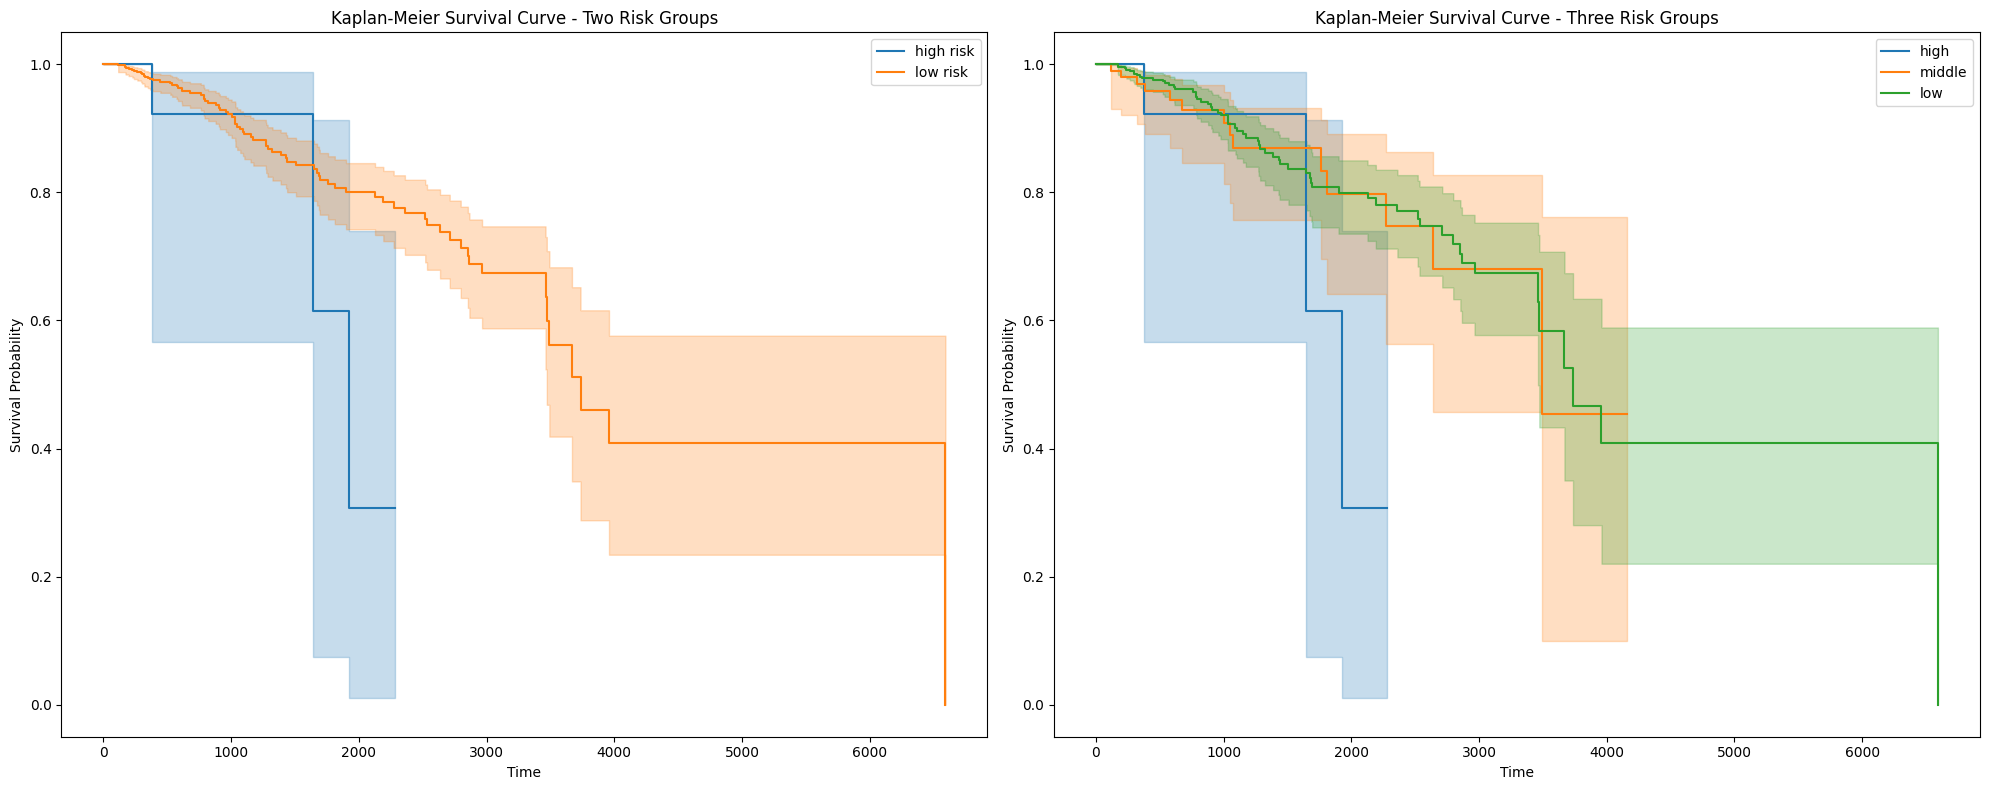

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from lifelines import KaplanMeierFitter


new_df = merged_data.drop(columns=['overall_survival', 'status',"Median_overall_survival","years_to_birth"])
numeric_data_new = new_df.select_dtypes(include=[np.number])

# Hierarchical clustering
linked = linkage(numeric_data_new, 'ward')

# 2 and 3 risk grups
label_2_clusters = fcluster(linked, 2, criterion='maxclust')
label_3_clusters = fcluster(linked, 3, criterion='maxclust')

processed_data_new = merged_data.copy()


processed_data_new['risk_group_2'] = label_2_clusters
processed_data_new['risk_group_3'] = label_3_clusters


kmf = KaplanMeierFitter()

# 2 risk groups Kaplan-Meier
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
risk_labels_2 = {1: "high risk", 2: "low risk"}
for label in np.unique(label_2_clusters):
    mask = processed_data_new['risk_group_2'] == label
    group_data = processed_data_new[mask]

    kmf.fit(group_data['overall_survival'], event_observed=group_data['status'], label=risk_labels_2[label])
    kmf.plot(ax=plt.gca())

plt.title('Kaplan-Meier Survival Curve - Two Risk Groups')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# 3 risk groups Kaplan-Meier
plt.subplot(1, 2, 2)
risk_labels_3 = {1: "high", 2: "middle", 3: "low"}
for label in np.unique(label_3_clusters):
    mask = processed_data_new['risk_group_3'] == label
    group_data = processed_data_new[mask]

    kmf.fit(group_data['overall_survival'], event_observed=group_data['status'], label=risk_labels_3[label])
    kmf.plot(ax=plt.gca())

plt.title('Kaplan-Meier Survival Curve - Three Risk Groups')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

plt.tight_layout()
plt.show()


In [ ]:
from lifelines.statistics import logrank_test

# calculate p for 2 risk groups
group1 = processed_data_new[processed_data_new['risk_group_2'] == 1]
group2 = processed_data_new[processed_data_new['risk_group_2'] == 2]
results_2 = logrank_test(group1['overall_survival'], group2['overall_survival'], event_observed_A=group1['status'], event_observed_B=group2['status'])
p_value_2 = results_2.p_value
print(f"P-value for the difference between two risk groups: {p_value_2}")

# for 3 risk groups
group1 = processed_data_new[processed_data_new['risk_group_3'] == 1]
group2 = processed_data_new[processed_data_new['risk_group_3'] == 2]
group3 = processed_data_new[processed_data_new['risk_group_3'] == 3]

results_3_12 = logrank_test(group1['overall_survival'], group2['overall_survival'], event_observed_A=group1['status'], event_observed_B=group2['status'])
results_3_13 = logrank_test(group1['overall_survival'], group3['overall_survival'], event_observed_A=group1['status'], event_observed_B=group3['status'])
results_3_23 = logrank_test(group2['overall_survival'], group3['overall_survival'], event_observed_A=group2['status'], event_observed_B=group3['status'])

print(f"P-value for the difference between risk groups 1 and 2: {results_3_12.p_value}")
print(f"P-value for the difference between risk groups 1 and 3: {results_3_13.p_value}")
print(f"P-value for the difference between risk groups 2 and 3: {results_3_23.p_value}")

P-value for the difference between two risk groups: 0.10215820457200468
P-value for the difference between risk groups 1 and 2: 0.19768758976324646
P-value for the difference between risk groups 1 and 3: 0.09381692516149528
P-value for the difference between risk groups 2 and 3: 0.7652434950821331
